# **EastWest Airlines K-Means Clustering Dataset**

This notebook provides an overview of the **EastWest Airlines K-Means Clustering Dataset**. The dataset is designed for clustering and segmentation tasks in data analysis and is ideal for exploring customer profiling for a hypothetical airline based on frequent flyer data.

---

## **1. Dataset Overview**
The **EastWest Airlines K-Means Clustering Dataset** focuses on customer profiling and segmentation based on their behavior in a frequent flyer program. It is a valuable resource for tasks such as clustering, customer segmentation, and exploratory data analysis.

---

## **2. Key Characteristics**

### **Features**
The dataset contains the following features:

- **ID**: Unique identifier for each customer.
- **Balance**: The number of frequent flyer miles earned.
- **Qual_miles**: Qualifying miles for a specific frequent flyer program tier.
- **cc1_miles**, **cc2_miles**, **cc3_miles**: Miles earned using different credit cards.
\
1 = under 5,000

  2 = 5,000 - 10,000

  3 = 10,001 - 25,000

  4 = 25,001 - 50,000

  5 = over 50,000
- **Bonus_miles**: Additional miles earned through special offers or promotions.
- **Bonus_trans**: Number of transactions associated with bonus miles.
- **Flight_miles_12mo**: Miles flown in the last 12 months.
- **Flight_trans_12**: Number of flight transactions in the last 12 months.
- **Days_since_enroll**: Days since the customer enrolled in the frequent flyer program.
- **Award**: Indicates if the customer received an award (binary: 1 for yes, 0 for no).

---

### **Purpose of Dataset**
The dataset is suitable for **K-Means Clustering** and customer segmentation tasks, allowing businesses to identify patterns in customer behavior.

---

### **Structure**
- **Type**: Tabular dataset.
- **Format**: CSV file.
- **Data Quality**: Clean dataset with no missing values, ready for clustering tasks.

---

### **Source**
- Shared by Kaggle user **Singhnproud77**. https://www.kaggle.com/datasets/singhnproud77/eastwestairlines-heirarchical-clustering
- Likely a synthetic or anonymized dataset designed for academic and project use.

---

### **Applications**
1. **Clustering Analysis**:
   - Group customers based on similarities in their behaviors.
2. **Customer Segmentation**:
   - Classify customers into actionable segments for improved marketing strategies.
3. **Exploratory Data Analysis (EDA)**:
   - Analyze trends in customer behavior and engagement.
4. **Visualization**:
   - Create scatter plots and cluster visualizations for interpreting the results of K-Means.

---

## **3. How to Use the Dataset**

### **Step 1: Exploratory Data Analysis (EDA)**
- Use Python libraries like `pandas`, `matplotlib`, and `seaborn` to explore and visualize data.
- Perform statistical analysis on features like `Balance`, `Bonus_miles`, and `Flight_miles_12mo`.

### **Step 2: Feature Scaling**
- Normalize or standardize features using methods like `MinMaxScaler` or `StandardScaler` for better clustering results.

### **Step 3: K-Means Clustering**
- Use the `KMeans` algorithm from the `sklearn` library to cluster the dataset.
- Determine the optimal number of clusters using methods like the **Elbow Method** or **Silhouette Score**.
- Visualize the clusters using scatter plots to identify meaningful customer groups.

### **Step 4: Insights**
- Interpret the clustering results to develop actionable insights, such as:
  - Identifying high-value customers.
  - Understanding behaviors of less engaged customers.
  - Designing targeted marketing strategies.

---

## **4. Potential Challenges**
- Choosing the optimal number of clusters (K) for K-Means.
- Ensuring proper scaling of features for meaningful clustering.
- Interpreting high-dimensional data effectively.




In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the cvs file
df = pd.read_csv('/content/EastWestAirlines.csv')

In [3]:
#printing the first 5 rows of dataset
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#finding the datatypes,colums and rows /information of the data provided
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
#there are 3999 rows ,12 colomns and all datatypes are int so there is no categorial data

In [6]:
#finding the datatypes,colums and rows /information of the data provided
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
#we can see diff between 75% and max values is high for balance,qual miles,bonus miles ,bonus trans,flight miles 12mo,
#almost all coloumns have high diff so boxplot and histplot is required for further analysis to find skewed data
#balance coloumn has exponential data so convert them using log function

In [8]:
# column for log transformation (numeric and positive)
cols_for_log = ['Balance']


for col in cols_for_log:
    # Add 1 to handle zero values before log transformation
    df[col] = np.log1p(df[col])

In [9]:
#checking the balance column
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,10.552024,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.275925,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,9.827065,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,10.671232,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,11.433936,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,14.348981,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


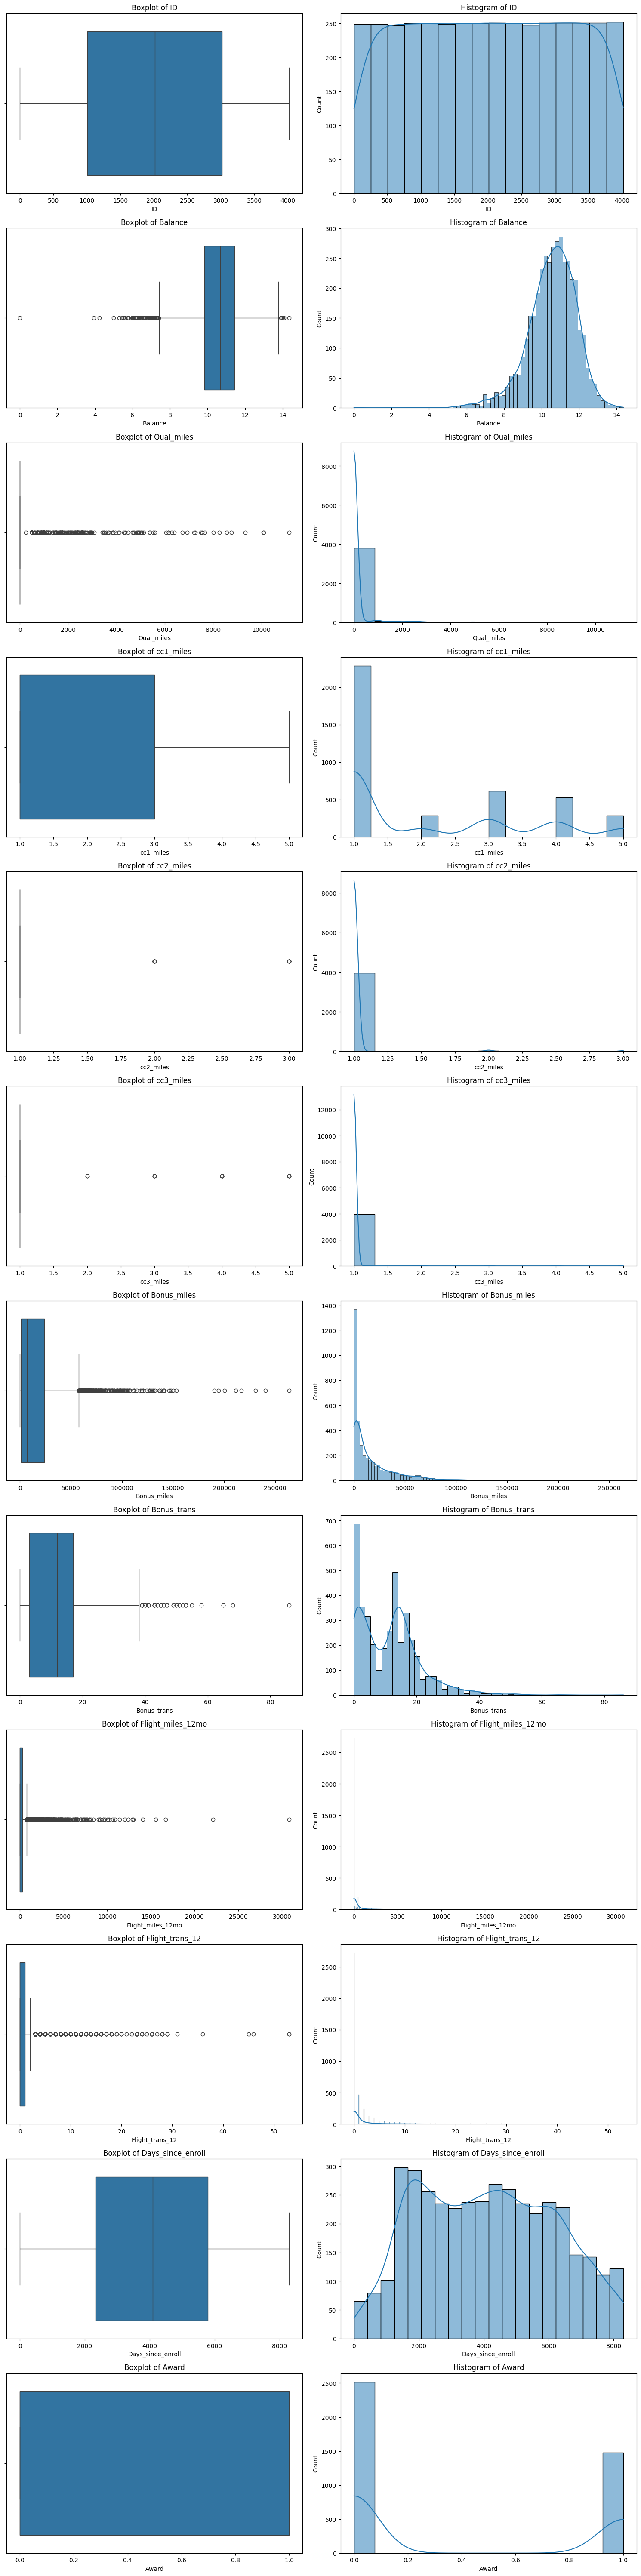

In [42]:
#visualizing the data using Boxplot and histogram
num_cols = len(df.select_dtypes(include=['number']).columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(15, 5 * num_cols))

for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(x=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {col}')

    sns.histplot(x=df[col], kde=True, ax=axes[i, 1])
    axes[i,1].set_title(f'Histogram of {col}')

plt.tight_layout()

In [11]:
#From histogram:
# Balance is left and right skewed and has few outliers ,most of the data is concentrated between ~6 to 14 ,highest count for balance is at 11 miles so more passengers have earned miles from award and few did not
#Qual_miles is mostly concenntrated at 0 and has only outliers so the data is discrete and right skewed so the topflight status is different for passengers
#cc1_miles has no outliers and most data is concentrated between 1 to 3 and highest peak is at 1 which is under 5000 miles for more than 2000 passengers so few passengers earned miles using freq. flyer credit card
#cc2_mles has only two datapoints so very few passengers earned miles using reward credit card and that to under 5000 miles
#cc3_miles also has very few datapoint so less no.of passengers earned miles using Small Business credit card and that is under 5000 miles
#Bonus_miles is right skewed and has outliers ,most data is concentrated around 0 to 5000 with a peak value at 0 so few users earned few miles from nonflight bonus transaction
#Bonus_trans is right skewed  and has few outliers ,most data is concentrated at 0 t0 40 ,so more passengers have done nonflight bonus transaction
#Flight_miles_12mo is right skewed with most data concentrated at 0 so data is deiscrete ,flight miles travelled is diff for most passengers
#Flight_trans_12 is right skewed and has few outliers and most data is concentrated at 0 hence discrete ,so only few passengers done flight transactions
#Days_since_enrolled has no outliers is a normal distribution with a peak value at ~300 days so most users are active
#Award has no outliers and has peak value at 0 for ~2500 users so most users did not get award / free flight while around ~1500 users got free flight
#To conclude more passengers have earned miles from award and few did not,the topflight status is different for passengers, only few passengers earned miles using freq. flyer credit card
#, very few passengers earned miles using reward credit card and that to under 5000 miles,less no.of passengers earned miles using Small Business credit card and that is under 5000 miles
#, few users earned few miles from nonflight bonus transaction, more passengers have done nonflight bonus transaction , flight miles travelled is diff for most passengers,only few passengers done flight transactions
#, most users are active , most users did not get award / free flight while around ~1500 users got free flight

In [12]:
#from the boxplot and histplot we can determine balance,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12 has outliers

In [13]:
# Identify outliers using IQR method for specific columns
cols_with_outliers = ['Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']

for col in cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the upper or lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [14]:
# fixing the outliers for the respective coloumns and checking whether the outliers are still present by drawing boxplot

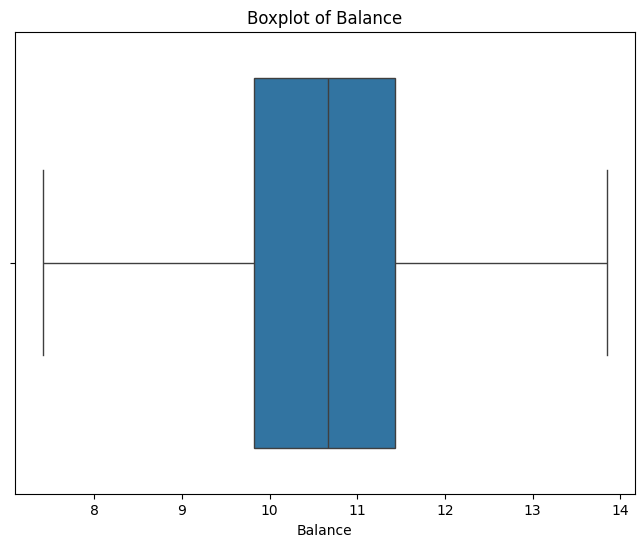

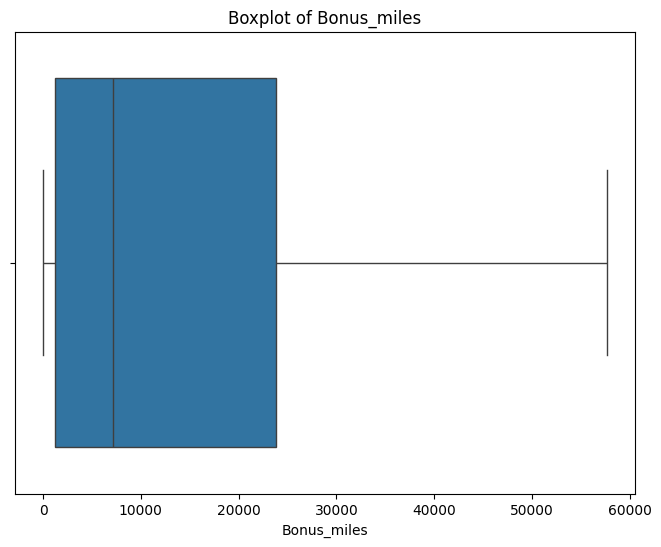

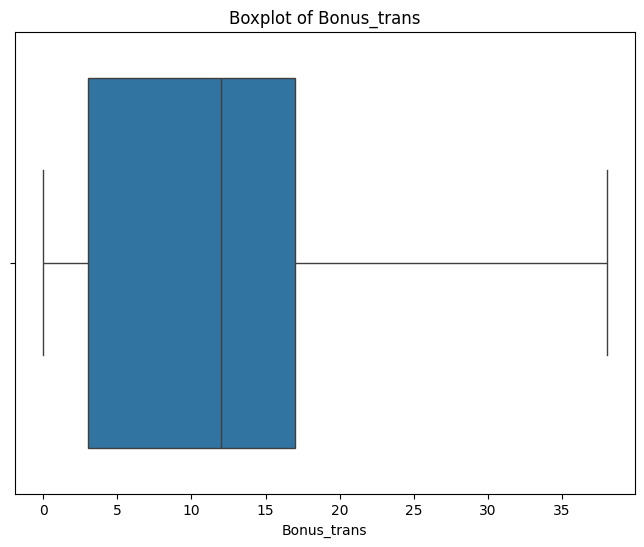

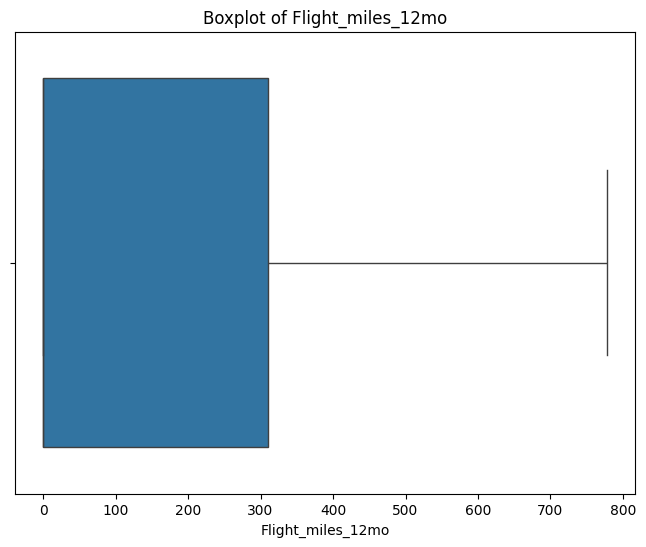

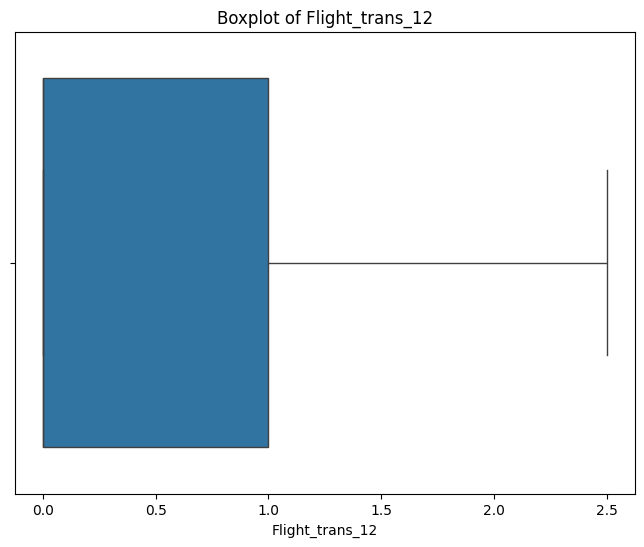

In [15]:
# Boxplots for specified columns
columns_to_plot = ['Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [16]:
#finding if there are null values in coloumns
df.isnull().sum()

,0
ID,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [ ]:
#There are no null values for the dataset

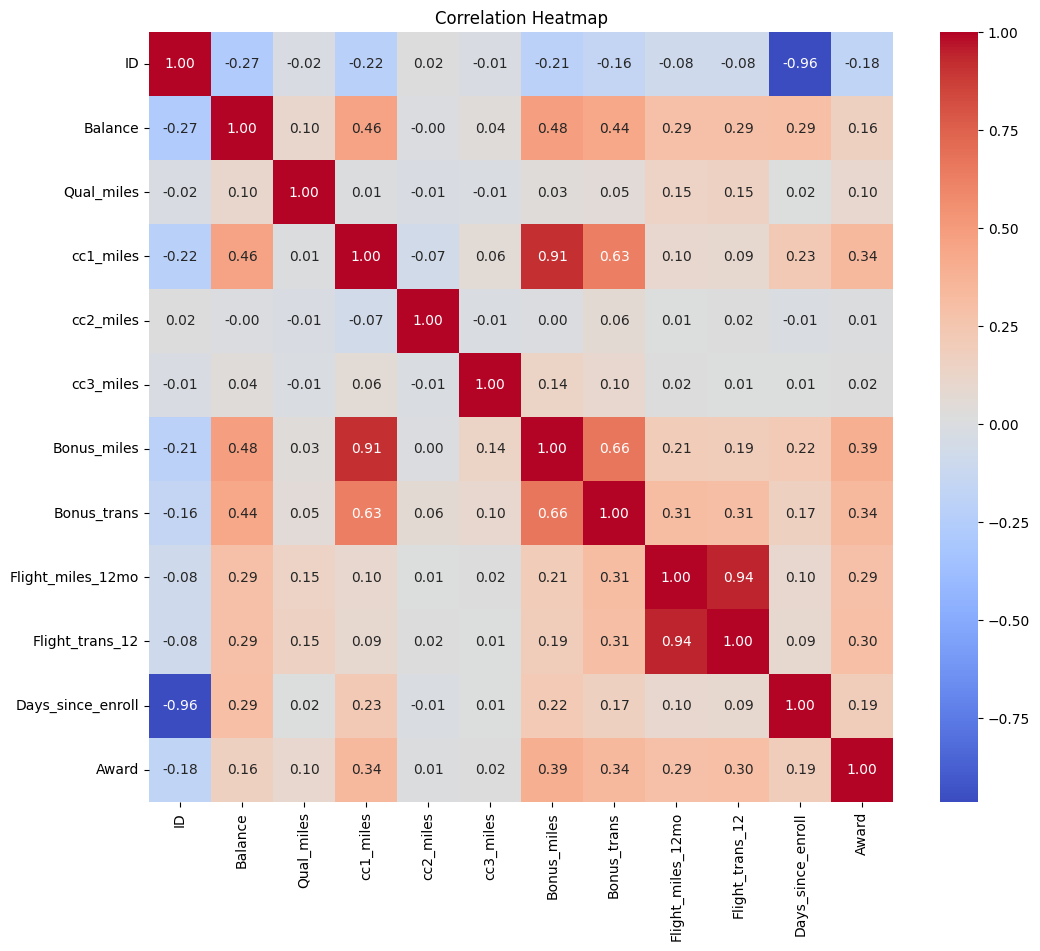

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#from corelation matrix we can see filight miles 12mo and flight trans 12 has high correlation -0.94, Bonus_miles and cc1_miles has correlation 0.91 ,Bonus_miles and Bonus_trans has correlation 0.66

In [19]:
#droping the columns that dosen't contribute or unnecessary
df = df.drop(['Qual_miles', 'cc2_miles', 'cc3_miles', 'ID'], axis=1)

In [20]:
df.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,10.245089,1,174.0,1.0,0.0,0.0,7000,0
1,9.865007,1,215.0,2.0,0.0,0.0,6968,0
2,10.629949,1,4123.0,4.0,0.0,0.0,7034,0
3,9.600827,1,500.0,1.0,0.0,0.0,6952,0
4,11.490199,4,43300.0,26.0,777.5,2.5,6935,1


In [21]:
#scaling /standardizing data so the all the data are in same units
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,1:])
df_scaled

array([[-0.76957841, -0.8430905 , -1.1488544 , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.76957841, -0.84082186, -1.03913266, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.76957841, -0.6245814 , -0.81968917, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.68312117,  0.55533457, -0.38080221, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.76957841, -0.82505202, -1.1488544 , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-0.76957841, -0.8527184 , -1.25857614, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [22]:
#finding Kmeans for the above the data
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    if i > 4:
      break


In [ ]:
#for finding wcss we use the range of clusters from 1 to 11 which is common range for kmeans clustering ,by giving a random state value we perform kmeans and find wcss for five clusters

In [23]:
wcss

[27993.000000000044,
 19217.1685928185,
 14654.09918646659,
 12232.688377715252,
 11469.226748512508]

In [ ]:
##low wcss/inertia means the cluster is effective or the data points are near to the centroid or within the cluster
#So by plotting wcss values on a elbow graph we find the optimal no.of clusters the elbow point where we see a bend in the curve or where it flattens is the optimal no. of clusters
#The meaning of this is the clusters before eblow point are added Wcss reduces significantly

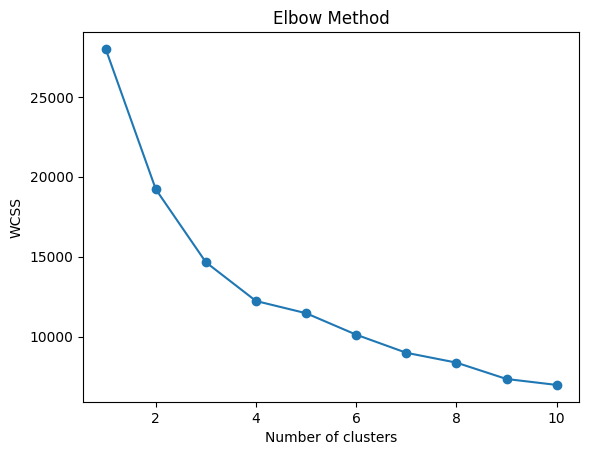

In [24]:
#using elbow graph to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# from the elbow graph we can see an elbow point at 2 and 3 but it's not clear so futher analyze using silhoutee score graph

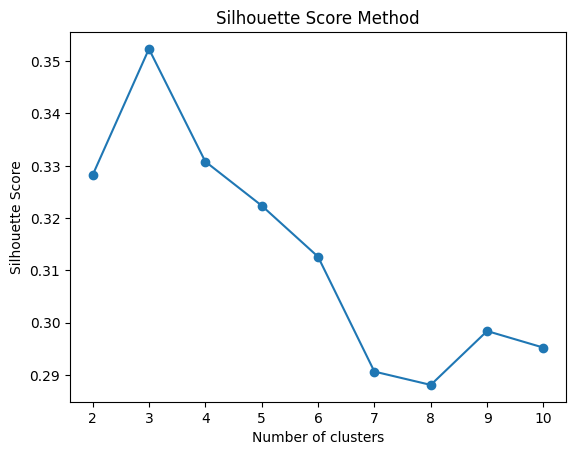

Optimal number of clusters based on Silhouette Score: 3


In [25]:
#using silhouette graph to find the optimal number of cluster more precisely
# Calculate silhouette scores for different cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):  # Test cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_n_clusters = np.argmax(silhouette_scores) + 2 # Add 2 because range starts from 2

print(f"Optimal number of clusters based on Silhouette Score: {optimal_n_clusters}")

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
kmeans.fit(df_scaled)
df['cluster_labels'] = kmeans.labels_

In [ ]:
#High silhouette score means optimal no.of clusters
# using High silohuette score from Silhouette Score Method we can determine optimal clusters as 3

In [26]:
# now optimal clusters for kmeans is 3 so using kmeans for 3 clusters
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# performing kmeans clustering for 3 clusters

In [27]:
#giving cluster id for each cluster
clusters_new.labels_

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [28]:
#provinding new column id for cluster labels
df['clusterid_new'] = clusters_new.labels_

In [29]:
clusters_new.cluster_centers_

array([[-0.3055492 , -0.14045184,  0.23700174,  1.6988241 ,  1.68350343,
         0.070835  ,  0.42289155],
       [-0.54616143, -0.5762818 , -0.48515365, -0.53294129, -0.52775309,
        -0.19636659, -0.4386725 ],
       [ 1.38295674,  1.33145999,  0.87145908, -0.05281476, -0.0531555 ,
         0.37034392,  0.64148889]])

In [30]:
df.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_labels,clusterid_new
0,10.245089,1,174.0,1.0,0.0,0.0,7000,0,0,1
1,9.865007,1,215.0,2.0,0.0,0.0,6968,0,0,1
2,10.629949,1,4123.0,4.0,0.0,0.0,7034,0,0,1
3,9.600827,1,500.0,1.0,0.0,0.0,6952,0,0,1
4,11.490199,4,43300.0,26.0,777.5,2.5,6935,1,2,0


In [31]:
#Scaling the data
StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

In [32]:
#segementation of each clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(scaled_data)

In [ ]:
# Segments the data into 3 and fits the  datapoints to each segments by finding the nearest datapoint to each clusters

In [33]:
df['segment']

,segment
0,1
1,1
2,1
3,1
4,0
...,...
3994,1
3995,1
3996,2
3997,1


In [34]:
print("Segmented User Data:")
print(df)

Segmented User Data:
        Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0     10.245089          1        174.0          1.0                0.0   
1      9.865007          1        215.0          2.0                0.0   
2     10.629949          1       4123.0          4.0                0.0   
3      9.600827          1        500.0          1.0                0.0   
4     11.490199          4      43300.0         26.0              777.5   
...         ...        ...          ...          ...                ...   
3994   9.824282          1       8525.0          4.0              200.0   
3995  11.072651          1        981.0          5.0                0.0   
3996  11.206373          3      25447.0          8.0                0.0   
3997  10.913269          1        500.0          1.0              500.0   
3998   8.012018          1          0.0          0.0                0.0   

      Flight_trans_12  Days_since_enroll  Award  cluster_labels  \
0          

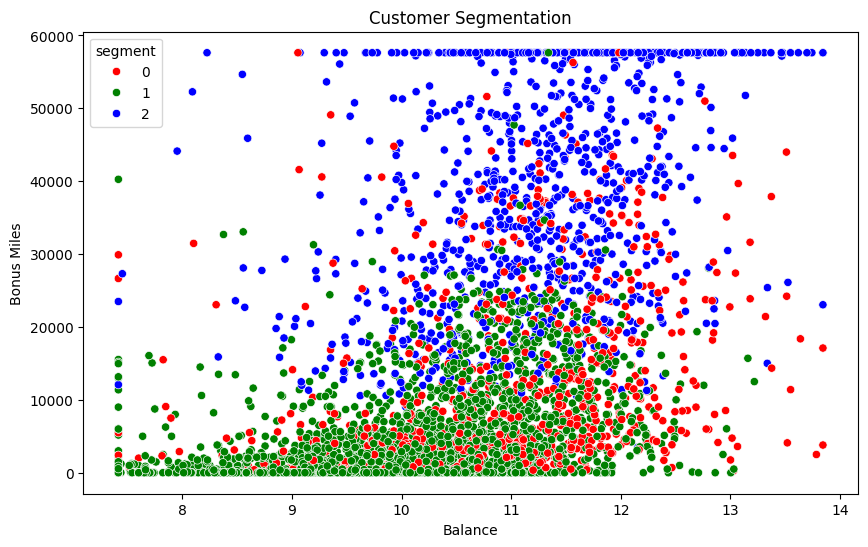

In [35]:
#scatterplot for coustmer segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='segment', data=df, palette=['red', 'green', 'blue']) # Assign colors to segments
plt.title('Customer Segmentation')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

In [36]:
#from the scatterplot we can see segment 2 has high bonusmiles and balance compared to others
#segment 1 has lower balance and bonusmiles
#segment 0 has moderate balance but low bonusmmiles
#so to conclude costumers can be segmentes to high spenders,low spenders, people intrested in rewards/promotions

# Kmeans clustering analysis

---
--->There are 3999 rows ,12 colomns and all datatypes are int so there is no categorial data
\
---->we can see diff between 75% and max values is high for balance,qual miles,bonus miles ,bonus trans,flight miles 12mo,almost all coloumns have high diff so boxplot and histplot is required for further analysis to find skewed data
\
---->balance coloumn has exponential data so convert them using log function
\
----> from data visualization histogram and boxplot

* Balance is left and right skewed and has few outliers ,most of the data is concentrated between ~6 to 14 ,highest count for balance is at 11 miles so more passengers have earned miles from award and few did not
*Qual_miles is mostly concenntrated at 0 and has only outliers so the data is discrete and right skewed so the topflight status is different for passengers
*cc1_miles has no outliers and most data is concentrated between 1 to 3 and highest peak is at 1 which is under 5000 miles for more than 2000 passengers so few passengers earned miles using freq. flyer credit card
*cc2_mles has only two datapoints so very few passengers earned miles using reward credit card and that to under 5000 miles
*cc3_miles also has very few datapoint so less no.of passengers earned miles using Small Business credit card and that is under 5000 miles
*Bonus_miles is right skewed and has outliers ,most data is concentrated around 0 to 5000 with a peak value at 0 so few users earned few miles from nonflight bonus transaction
*Bonus_trans is right skewed  and has few outliers ,most data is concentrated at 0 t0 40 ,so more passengers have done nonflight bonus transaction
*Flight_miles_12mo is right skewed with most data concentrated at 0 so data is deiscrete ,flight miles travelled is diff for most passengers
*Flight_trans_12 is right skewed and has few outliers and most data is concentrated at 0 hence discrete ,so only few passengers done flight transactions
*Days_since_enrolled has no outliers is a normal distribution with a peak value at ~300 days so most users are active
*Award has no outliers and has peak value at 0 for ~2500 users so most users did not get award / free flight while around ~1500 users got free flight

  
---->To conclude more passengers have earned miles from award and few did not,the topflight status is different for passengers, only few passengers earned miles using freq. flyer credit card, very few passengers earned miles using reward credit card and that to under 5000 miles,less no.of passengers earned miles using Small Business credit card and that is under 5000 miles, few users earned few miles from nonflight bonus transaction, more passengers have done nonflight bonus transaction , flight miles travelled is diff for most passengers,only few passengers done flight transactions, most users are active , most users did not get award / free flight while around ~1500 users got free flight

--->From the boxplot and histplot we can determine balance,bonus_miles bonus_trans,flight_miles_12mo,flight_trans_12 has outliers that are fixed using IQR method

---->There are no null values for the dataset so we can procedd with further analysis

---->from corelation matrix we can see filight miles 12mo and flight trans 12 has high correlation -0.94, Bonus_miles and cc1_miles has correlation 0.91 ,Bonus_miles and Bonus_trans has correlation 0.66

--->droping the columns that dosen't contribute or unnecessary such as 'Qual_miles', 'cc2_miles', 'cc3_miles', 'ID'

--->wcss (within cluster sum of square) measures how closely the data points in a cluster are grouped around their centroid. It is the sum of the squared distances between each data point and its cluster's centroid. inertia is a measure of how tightly points are grouped around centroids


 *  So low wcss/inertia means the cluster is effective or the data points are near to the centroid or within the cluster
 * So by plotting wcss values on a elbow graph we find the optimal no.of clusters
the elbow point where we see a bend in the curve or where it flattens is the optimal no. of clusters
 * The meaning of this is the clusters before eblow point are added Wcss reduces
  significantly

--->The silhouette score measures how well-separated and compact the clusters are. It considers both:

  *   Intra-cluster cohesion: How close data points are to others within the same cluster

  *   Inter-cluster separation: How far data points are from points in other clusters.

---->So high silhoutee score means optmial number of clusters

---->for finding wcss we use the range of clusters from 1 to 11 which is common range for kmeans clustering ,by giving a random state value we perform kmeans and find wcss for five clusters

---->low wcss/inertia means the cluster is effective or the data points are near to the centroid or within the cluster

--->So by plotting wcss values on a elbow graph we find the optimal no.of clusters the elbow point where we see a bend in the curve or where it flattens is the optimal no. of clusters

---->The meaning of this is the clusters before eblow point are added Wcss reduces significantly

---->from the elbow graph we can see an elbow point at 2 and 3 but it's not clear so futher anaalyze using silhoutee score graph

---->High silhouette score means optimal no.of clusters,High silohuette score from Silhouette Score Method we can determine optimal clusters as 3

----> perform kmeans for 3 clusters and lablel new clusters then Segments the data into 3 clusters/ segments and fits the  datapoints to each segments by finding the nearest datapoint to each clusters

---->#from the scatterplot we can see segment 2 has high bonusmiles and balance compared to others
 * segment 1 has lower balance and bonusmiles
 * segment 0 has moderate balance but low bonusmmiles
\

---->so to conclude costumers can be segmentes to high spenders,low spenders, people intrested in rewards/promotions











***Process : ***\
1.After importing the neccessary libraries, and reading the dataset we get the info of the dataset which gives the types of values that are present in the data set such as int, float, object etc. and the number of entries in the dataset etc.,
\
2.then we find the count ,mean ,standard deviation of data from which we can see whether the data is skewed by comapring the 75% to max value if the there is sudden jump or vast diff in values then we can assume the data is skewed
\
3.find the null values if present replace them with mean , median  and mode values mean,median for numerical data -if outliers present median and mode for categorial data
\
4.Visualize the data using


*   Histograms and density plots to visualize distributions.
*   Boxplots to detect outliers.

*   Scatter plots for numerical features to identify correlations.
*  Bar plots for categorical data.

*  Pairplots or correlation heatmaps for relationships among variables.
\
5.From the visualization if outliers are on the extreme points use IQR method where we subtract third quartile(75%) and first quartile(25%) to get Iqr value  then calulate upperbound and lowerbound values to fix them and apply log transform to fix skewness / e values.
\
6.Use Feature engineer if neccessary combine the coloumns or add new cloumns ,use label encoding for categorial data and scale or standardize the data so that all the data is in the same units without changing the range of data.
\
7.Analyse the correlation heatmap and find the coloumns that has hight correlation values with the target variable. Drop unesscary cloumns to improve the effeciency of the model